## Tu primera red neuronal en Python y Tensorflow

Usaremos la función print() que veremos más adelante con profundidad.

In [13]:
import tensorflow as tf
import numpy as np

In [14]:
# Datos reales sobre 
# 7 entradas de los grados celsius
celsius = np.array([-40 , -10 , 0 , 8 , 15 , 22 , 38])
# 7 salida de los grados fharenheit
fahrenheit = np.array([-40 , 14 , 32 , 46 , 59 , 72 , 100] , dtype=float)

In [5]:
# Keras : Framework nos permite simplificar las redes neuronales simples
# Capas "Dense" del tipo Keras : 
# Son capas que tienen conexiones desde cada neurona a todas las neuronas de la siguiente capa
#                                ↓        La capa de salida solo tiene una 
#                                ↓        neurona 'usamos la variable input shape'
#                                ↓       Indico que tenemos una entrada con
#                                ↓        una neurona 'nos autoregistra 
#                                ↓        la capa de entrada' con una neurona
#                                ↓        ↓
# capa = tf.keras.layers.Dense(units=1 , input_shape=[1]) # units = 1 , input_shape = 1
# Utilizo el modelo secuencial entre otros modelos
# Indico la capa que creamos aunque ya tenemos el modelo preparado
# modelo = tf.keras.Sequential([capa]) # Sequential = linear stack of layers
# Compila el modelo para entrenar el modelo

**¿Qué es `input_shape=[1]`?**

`input_shape=[1]` es un argumento que se pasa a la capa `Dense` de Keras para especificar la forma del tensor de entrada
En este caso, `input_shape=[1]` indica que el tensor de entrada a esta capa debe ser un vector unidimensional.

**¿Qué representa `input_shape=[1]`?**

`input_shape=[1]` representa la forma de los datos de entrada que se espera que reciba la capa. 
En este caso, `input_shape=[1]` significa que la capa espera recibir datos de entrada que sean vectores unidimensionales.

**¿De dónde viene `input_shape=[1]`?**

`input_shape=[1]` viene de los datos con los que estás trabajando. Debes configurar `input_shape` para que coincida con la forma de tus datos de entrada. 
Por ejemplo, si estás trabajando con datos que son vectores unidimensionales, entonces usarías `input_shape=[1]`

**¿Cómo se usa `input_shape=[1]`?**

`input_shape=[1]` se usa al definir la arquitectura de tu modelo de red neuronal. 
Cuando agregas una capa a tu modelo usando `tf.keras.layers.Dense`, puedes especificar `input_shape=[1]` para indicar que esta capa debe esperar recibir vectores unidimensionales como entrada

In [16]:
# Agrego 2 capas y 3 neuronas en la capa oculta
oculta1 = tf.keras.layers.Dense(units=3 , input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1 , oculta2 , salida])

In [17]:
# Adam = Método de descenso de gradiente estocástico que se basa en la estimación adaptativa de momentos de primer y segundo orden
# mean_squared_error = Calcula la media de cuadrados de errores entre etiquetas y predicciones
modelo.compile(
    #                             Tasa de aprendizaje : 0.1 - ajustar pesos y sesgos
    #                                  ↓
    #                                  ↓
    #                                  ↓
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

In [18]:
print("Comenzando el entrenamiento...")
# Ahora entrenamos nuestro modelo con datos usando la funcion fit
# 1º indicamos los datos de entrada y resultados esperados
# 2º epochs = solo tenemos 7 datos - una vuelta significa revisar los 7 una sola vez
# Tenemos que darle muchas vueltas a los datos para que se optimice lo max posible
# verbose = False → para evitar ruido en los datos
historial = modelo.fit(celsius , fahrenheit , epochs=1000 , verbose=False)
print("Modelo entrenado!")

Comenzando el entrenamiento...
Modelo entrenado!


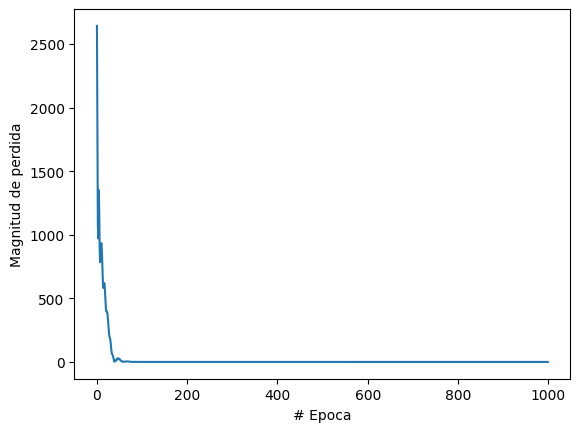

In [19]:
# Vamos a ver la función de perdida
# Nos indica como de mal están los resultados de la red en cada vuelta que dio
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de perdida")
plt.plot(historial.history["loss"])
## Como le dimos 1000 vueltas - esas vueltas nos aparecen abajo entre


In [20]:
print("Hagamos una prediccion")
resultado = modelo.predict([100.0])
print("El resultado es : " + str(resultado) + " fharenheit") # 12:20

Hagamos una prediccion
1/1 [==============================] - 0s 101ms/step
El resultado es : [[211.74742]] fharenheit


In [23]:
print("Variables internas del modelo")
# print(capa.get_weights()) # 12:30
print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())

Variables internas del modelo
[array([[-0.2695609 , -0.4750531 , -0.34560877]], dtype=float32), array([-3.8606198, -3.8614678, -3.8500001], dtype=float32)]
[array([[ 1.357941  , -0.7542003 , -0.02827949],
       [ 0.90737456, -0.59022605,  0.18399917],
       [ 0.03215661, -1.3877195 , -0.4266336 ]], dtype=float32), array([-3.9244723,  3.8390677,  2.8068821], dtype=float32)]
[array([[-0.8319045],
       [ 1.1460551],
       [ 0.3192195]], dtype=float32), array([3.6084816], dtype=float32)]
